In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hranalytics/WA_Fn-UseC_-HR-Employee-Attrition.csv


# IMPORTING LIBRARIES

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os 
import warnings 

warnings.filterwarnings('ignore')

# LOADING DATASET

In [4]:
dataset = pd.read_csv('/kaggle/input/hranalytics/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
dataset.shape

(1470, 35)

In [7]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
print(dataset[['DailyRate','HourlyRate','MonthlyRate','MonthlyIncome']])

      DailyRate  HourlyRate  MonthlyRate  MonthlyIncome
0          1102          94        19479           5993
1           279          61        24907           5130
2          1373          92         2396           2090
3          1392          56        23159           2909
4           591          40        16632           3468
...         ...         ...          ...            ...
1465        884          41        12290           2571
1466        613          42        21457           9991
1467        155          87         5174           6142
1468       1023          63        13243           5390
1469        628          82        10228           4404

[1470 rows x 4 columns]


In [9]:
print(dataset['EmployeeCount'].unique())

[1]


In [10]:
print(dataset['StandardHours'].unique())

[80]


In [11]:
print(dataset['Over18'].unique())

['Y']


In [12]:
dataset = dataset.drop(['EmployeeCount','StandardHours','Department','MonthlyRate','HourlyRate','DailyRate','EmployeeNumber','DistanceFromHome','Over18'], axis=1)
#these values are same throughout the table
#department assumed to not effect 
#cannot determine monthly rate , daily rate and hourly rate actually are

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Education                 1470 non-null   int64 
 4   EducationField            1470 non-null   object
 5   EnvironmentSatisfaction   1470 non-null   int64 
 6   Gender                    1470 non-null   object
 7   JobInvolvement            1470 non-null   int64 
 8   JobLevel                  1470 non-null   int64 
 9   JobRole                   1470 non-null   object
 10  JobSatisfaction           1470 non-null   int64 
 11  MaritalStatus             1470 non-null   object
 12  MonthlyIncome             1470 non-null   int64 
 13  NumCompaniesWorked        1470 non-null   int64 
 14  OverTime                

# HANDLING CATEGORICAL DATA

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['Attrition'] = le.fit_transform(dataset.Attrition.values)
dataset['BusinessTravel'] = le.fit_transform(dataset.BusinessTravel.values)
dataset['EducationField'] = le.fit_transform(dataset.EducationField.values)
dataset['Gender'] = le.fit_transform(dataset.Gender.values)
dataset['JobRole'] = le.fit_transform(dataset.JobRole.values)
dataset['MaritalStatus'] = le.fit_transform(dataset.MaritalStatus.values)
dataset['OverTime'] = le.fit_transform(dataset.OverTime.values)


In [15]:
dataset.head()

,Age,Attrition,BusinessTravel,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,0,3,2,7,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,1,1,3,1,2,2,6,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,2,4,4,1,2,1,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,4,1,4,0,3,1,6,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,1,3,1,1,3,1,2,...,3,4,1,6,3,3,2,2,2,2


# FINDING CORRELATION MATRIX

<Axes: >

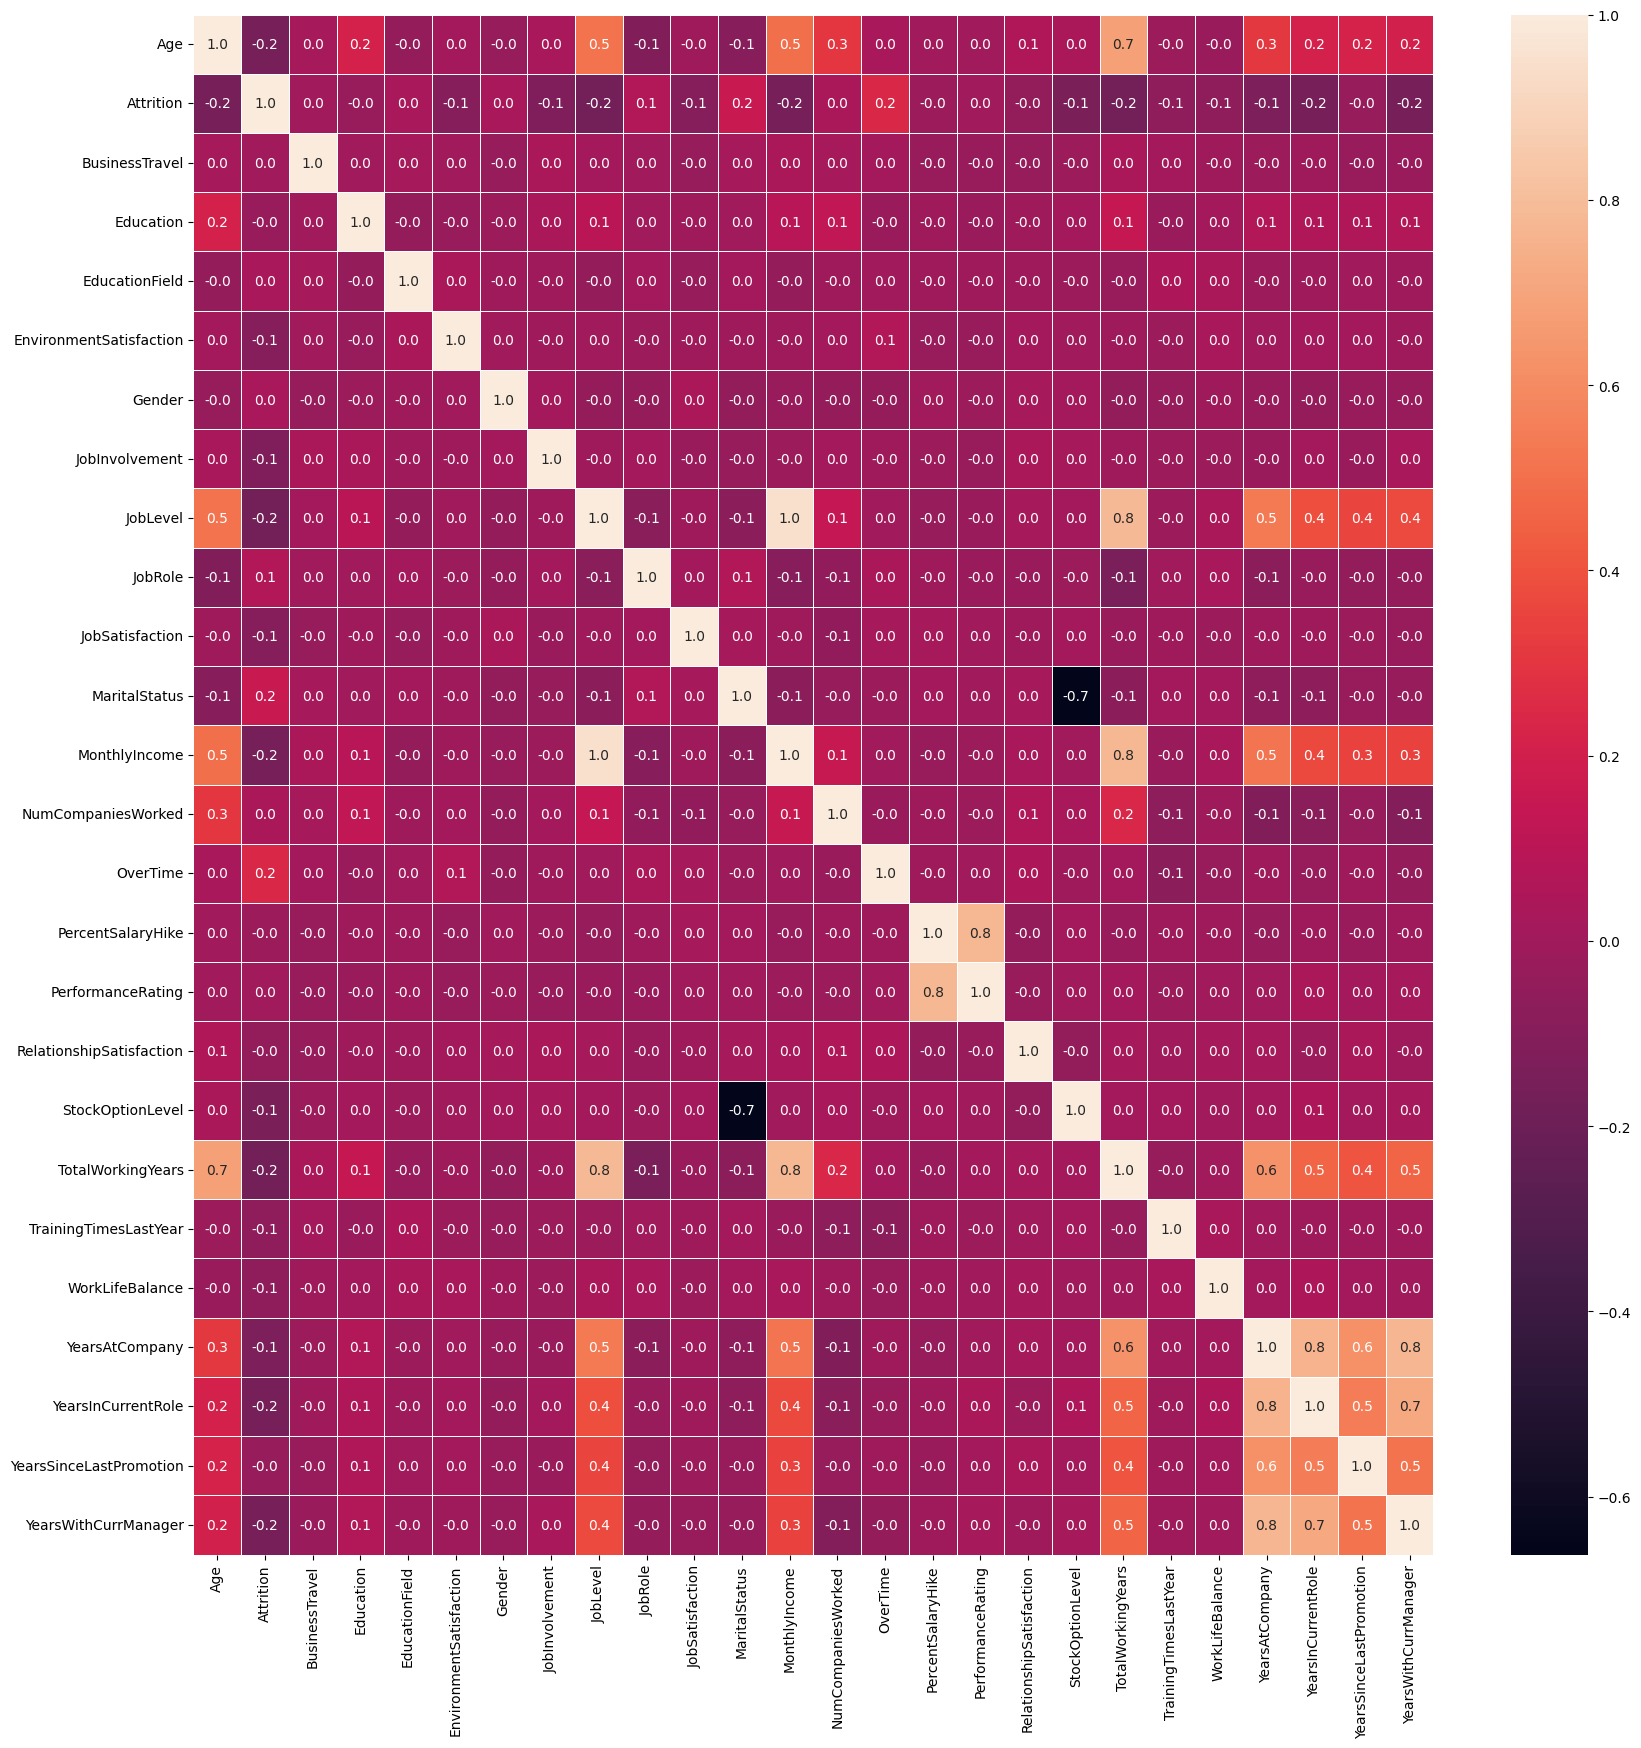

In [16]:
fig, ax= plt.subplots(figsize=(20,20))
#data_corr= dataset.drop(['BusinessTravel','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'], axis=1) 
sns.heatmap(dataset.corr(),annot=True, linewidths=0.5, fmt='0.1f', ax=ax)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   Education                 1470 non-null   int64
 4   EducationField            1470 non-null   int64
 5   EnvironmentSatisfaction   1470 non-null   int64
 6   Gender                    1470 non-null   int64
 7   JobInvolvement            1470 non-null   int64
 8   JobLevel                  1470 non-null   int64
 9   JobRole                   1470 non-null   int64
 10  JobSatisfaction           1470 non-null   int64
 11  MaritalStatus             1470 non-null   int64
 12  MonthlyIncome             1470 non-null   int64
 13  NumCompaniesWorked        1470 non-null   int64
 14  OverTime                  1470 non-null 

# TRAINING THE MODEL

In [18]:
X = dataset[['OverTime','MonthlyIncome','MaritalStatus','JobLevel','Age','TotalWorkingYears','YearsInCurrentRole','YearsWithCurrManager']].copy()
y = dataset[['Attrition']]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
import tensorflow as tf

In [25]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [27]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 120)

Epoch 1/120
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1912 - loss: 0.9581
Epoch 2/120
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3520 - loss: 0.8020 
Epoch 3/120
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5133 - loss: 0.7135
Epoch 4/120
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6178 - loss: 0.6713
Epoch 5/120
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7512 - loss: 0.6151
Epoch 6/120
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8197 - loss: 0.5704
Epoch 7/120
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8395 - loss: 0.5279
Epoch 8/120
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8363 - loss: 0.5094
Epoch 9/120
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8449 - loss: 0.4774
Epoch 10/120
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8471 - loss: 0.4582
Epoch 11/120
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8392 - loss: 0.4537
Epoch 12/120
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [42]:

y_pred= ann.predict(X_test)







10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [41]:
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [49]:
y_test = (y_test > 0.5)
y_pred = (y_pred > 0.5)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[237   8]
 [ 37  12]]


0.8469387755102041